In [68]:
import numpy as np # linear algebra
import pandas as pd # data processing
from sklearn.preprocessing import Imputer
from sklearn.neighbors import NearestNeighbors
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from IPython.display import display
import seaborn as sns
sns.set_style('whitegrid')

In [4]:
ground_data_1 = pd.read_csv(r"C:\Users\kshah3\Documents\Kartik IMP\CSC591 ML\Ap1\AP1 Materials and Files-20190829\train_data\train_data\train_groundtruth\tr_grnd_1.csv")
ground_data_1.head()

,time,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13
0,0,231.455136,7.065539,31.552362,176.942885,74.724240,19.164741,160.585702,196.760533,15.656928,21.489706,52.592477,3.937804,202.422745
1,225,233.443180,6.284800,36.515232,176.942885,69.607372,17.303101,160.585702,187.434032,19.769887,21.489706,53.611339,3.937804,242.045839
2,800,229.467092,6.909391,36.515232,173.675164,67.962665,17.569049,155.495242,213.340979,28.124336,22.059795,54.630201,3.780817,261.064923
3,1515,225.491003,6.597096,34.860942,172.585924,64.855995,16.505255,158.888882,207.123312,25.296676,22.344839,49.535892,3.309856,199.252898
4,3013,231.455136,6.597096,43.132392,179.121366,62.663051,15.973358,160.585702,195.724255,19.127237,22.202317,34.252965,2.838896,188.158431


In [5]:
columns = ['Time', 'Chloride', 'Potassium', 'Bicarb', 'Sodium', 'Hematocrit', 'Hemoglobin', 'MCV', 'Platelets', 'WBC Count', 'RDW', 'BUN', 'Creatine', 'Glucose']
ground_data_1.columns=columns
ground_data_1.head()

,Time,Chloride,Potassium,Bicarb,Sodium,Hematocrit,Hemoglobin,MCV,Platelets,WBC Count,RDW,BUN,Creatine,Glucose
0,0,231.455136,7.065539,31.552362,176.942885,74.724240,19.164741,160.585702,196.760533,15.656928,21.489706,52.592477,3.937804,202.422745
1,225,233.443180,6.284800,36.515232,176.942885,69.607372,17.303101,160.585702,187.434032,19.769887,21.489706,53.611339,3.937804,242.045839
2,800,229.467092,6.909391,36.515232,173.675164,67.962665,17.569049,155.495242,213.340979,28.124336,22.059795,54.630201,3.780817,261.064923
3,1515,225.491003,6.597096,34.860942,172.585924,64.855995,16.505255,158.888882,207.123312,25.296676,22.344839,49.535892,3.309856,199.252898
4,3013,231.455136,6.597096,43.132392,179.121366,62.663051,15.973358,160.585702,195.724255,19.127237,22.202317,34.252965,2.838896,188.158431


In [7]:
## Countplot the number of NaN values for each entry
grd_1_data_without_time = ground_data_1.iloc[0:, 1:]
grd_1_data_without_time

,Chloride,Potassium,Bicarb,Sodium,Hematocrit,Hemoglobin,MCV,Platelets,WBC Count,RDW,BUN,Creatine,Glucose
0,231.455136,7.065539,31.552362,176.942885,74.724240,19.164741,160.585702,196.760533,15.656928,21.489706,52.592477,3.937804,202.422745
1,233.443180,6.284800,36.515232,176.942885,69.607372,17.303101,160.585702,187.434032,19.769887,21.489706,53.611339,3.937804,242.045839
2,229.467092,6.909391,36.515232,173.675164,67.962665,17.569049,155.495242,213.340979,28.124336,22.059795,54.630201,3.780817,261.064923
3,225.491003,6.597096,34.860942,172.585924,64.855995,16.505255,158.888882,207.123312,25.296676,22.344839,49.535892,3.309856,199.252898
4,231.455136,6.597096,43.132392,179.121366,62.663051,15.973358,160.585702,195.724255,19.127237,22.202317,34.252965,2.838896,188.158431
5,231.455136,6.440948,44.786682,178.032126,61.566580,15.441460,158.888882,206.087034,15.528398,22.487361,30.177517,2.367935,192.913203
6,229.467092,6.284800,46.440972,176.942885,62.114816,15.707409,158.888882,228.885147,16.042518,22.629883,30.177517,2.524922,215.102135
7,237.419269,7.065539,48.095262,183.478327,NaN,NaN,NaN,NaN,NaN,NaN,30.177517,2.681909,216.687059
8,227.479047,6.128653,43.132392,178.032126,61.201089,15.042537,160.585702,275.517651,15.656928,23.057450,29.158655,2.367935,433.821611
9,235.431225,7.221687,43.132392,181.299846,63.211287,15.973358,162.282522,294.170652,14.885748,22.772405,30.177517,2.367935,210.347364


In [15]:
grd_1_data_without_time['NumOfNulls'] = grd_1_data_without_time.isnull().sum(axis=1)
grd_1_data_without_time['NumOfNulls']

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     6
8     0
9     0
10    0
11    6
12    0
13    0
14    0
15    0
16    0
Name: NumOfNulls, dtype: int64

In [23]:
print(len(grd_1_data_without_time))
print(grd_1_data_without_time.NumOfNulls==0)
print(len(grd_1_data_without_time[grd_1_data_without_time.NumOfNulls==0]))
print('The proportion of entries with no NaN values is {:.2f}%'.format(len(grd_1_data_without_time[grd_1_data_without_time.NumOfNulls==0])/len(grd_1_data_without_time)*100))

17
0      True
1      True
2      True
3      True
4      True
5      True
6      True
7     False
8      True
9      True
10     True
11    False
12     True
13     True
14     True
15     True
16     True
Name: NumOfNulls, dtype: bool
15
The proportion of entries with no NaN values is 88.24%


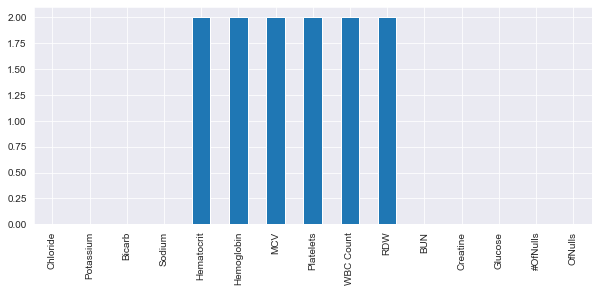

In [34]:
## Plot graphs to show how values for each entry evolves with time
NumOfNullwithTime = grd_1_data_without_time.drop('NumOfNulls', axis=1).isnull().sum()

sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
pbar = NumOfNullwithTime.plot.bar()
plt.show()

In [35]:
## Return index of column (0-83) where the first non-NA number appears. If none, return 84
def FirstNonNull(row):
    count=0
    for col in row:
        if col==False: return count
        else: count = count+1
    return count

## Return index of column (0-83) where the last non-NA number appears, If none, return -1
def LastNonNull(row):
    count=0
    flag=-1
    for col in row:
        if col==False:
            flag=count
            count=count+1
        else: count=count+1
    return flag

In [43]:
## I need this function for the cases of all NaN entries (NullinService value becomes 0 from -83)
def Setzero(x):
    if x<0: return 0
    else: return x

## Number of NaN values before service period
groupnull = aguah.iloc[:,0]
groupnull = pd.concat([groupnull, grd_1_data_without_time], axis=1)

groupnull['FirstNonNull'] = grd_1_data_without_time.copy().drop(['NumOfNulls'], axis=1).isnull().apply(FirstNonNull,axis=1)
groupnull['LastNonNull'] = grd_1_data_without_time.copy().drop(['NumOfNulls'],axis=1).isnull().apply(LastNonNull,axis=1)
groupnull['NullInService'] = groupnull.NumOfNulls - groupnull.FirstNonNull - (len(grd_1_data_without_time.columns)-1-groupnull.LastNonNull) +1    
groupnull['NullInService'] = groupnull['NullInService'].apply(Setzero)
groupnull.NullInService.value_counts(sort=False).head(6) ## Print only head values

0    15
6     2
Name: NullInService, dtype: int64

In [50]:
contLong = groupnull[groupnull.NumOfNulls==0]
contShort = groupnull[(groupnull.NumOfNulls>0) & (groupnull.NullInService==0)]
interupted = groupnull[(groupnull.NullInService)>0]
print('Length of 3 groups: (Non-NA Group, Edge-NA Group, Interupted Group) = ({}, {}, {})'.format(len(contLong), len(contShort), len(interupted)))
print(contLong)

Length of 3 groups: (Non-NA Group, Edge-NA Group, Interupted Group) = (15, 0, 2)
     time    Chloride  Potassium     Bicarb      Sodium  Hematocrit  \
0       0  231.455136   7.065539  31.552362  176.942885   74.724240   
1     225  233.443180   6.284800  36.515232  176.942885   69.607372   
2     800  229.467092   6.909391  36.515232  173.675164   67.962665   
3    1515  225.491003   6.597096  34.860942  172.585924   64.855995   
4    3013  231.455136   6.597096  43.132392  179.121366   62.663051   
5    3746  231.455136   6.440948  44.786682  178.032126   61.566580   
6    4434  229.467092   6.284800  46.440972  176.942885   62.114816   
8    6140  227.479047   6.128653  43.132392  178.032126   61.201089   
9    7497  235.431225   7.221687  43.132392  181.299846   63.211287   
10   8940  229.467092   7.377834  44.786682  180.210606   69.607372   
12  10378  227.479047   7.846278  41.478102  175.853645   68.693646   
13  11874  235.431225   8.002425  38.169522  175.853645   54.074023

In [153]:
## Test various imputation methods using the group of complete entries (Non-NA Group above)
rng = np.random.RandomState()
missing_rate = 0.01  ## Here, 1 for use the whole set of entries to score (0.01 only for display)

## Prepare a scoring set within Non-NA Group 
num_total = len(contLong)
num_score = int(np.ceil(missing_rate*num_total))
missing_samp = np.hstack((np.zeros(num_total-num_score, dtype=np.bool), np.ones(num_score, dtype=np.bool)))
rng.shuffle(missing_samp)
cl_score = contLong.iloc[:,1:14][missing_samp.tolist()]

## Columns where holes to be made
col =rng.randint(0, 13, num_score)
print(col)

## Save the answer set before making the "holes" in the scoring group (1 hole (missing data) per row)
cl_score_orig = cl_score.copy() ## save the original for KNN method (for reference)
answer = cl_score.values[np.arange(num_score), col]
print(answer)
cl_score.values[np.arange(num_score), col] = np.nan

## Function for scoring (squared mean error by answer and imputed values)
def Impute_error(imputed, answer):
    return np.sqrt(np.square(imputed-answer).sum())/len(answer)

[12]
[202.42274507]


In [154]:
## Start with simple imputation methods: Mean, Median, Most frequent value, Forward fill, and Backward fill
cl_score_mean = cl_score.copy()
imp_mean = Imputer(missing_values='NaN', strategy='mean', axis=1, copy=False)
imp_mean.fit_transform(cl_score_mean)
imputed_mean = cl_score_mean.values[np.arange(num_score), col]
                  
cl_score_median = cl_score.copy()
imp_median = Imputer(missing_values='NaN', strategy='median', axis=1, copy=False)
imp_median.fit_transform(cl_score_median)
imputed_median = cl_score_median.values[np.arange(num_score), col]

cl_score_mfre = cl_score.copy()
imp_mfre = Imputer(missing_values='NaN', strategy='most_frequent', axis=1, copy=False)
imp_mfre.fit_transform(cl_score_mfre)
imputed_mfre = cl_score_mfre.values[np.arange(num_score), col]

## NaN values at head can't be filled with ffill so complement with bfill
cl_score_ffill = cl_score.copy()
cl_score_ffill = cl_score_ffill.fillna(method='ffill', axis=1).fillna(method='bfill', axis=1) 
imputed_ffill = cl_score_ffill.values[np.arange(num_score), col]

## NaN values at tail can't be filled with bfill so complement with ffill
cl_score_bfill = cl_score.copy()
cl_score_bfill = cl_score_bfill.fillna(method='bfill', axis=1).fillna(method='ffill', axis=1)
imputed_bfill = cl_score_bfill.values[np.arange(num_score), col]

display(Impute_error(imputed_mean, answer))
display(Impute_error(imputed_median, answer))
display(Impute_error(imputed_mfre, answer))
display(Impute_error(imputed_ffill, answer))
display(Impute_error(imputed_bfill, answer))

c:\users\kshah3\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
c:\users\kshah3\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
c:\users\kshah3\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


119.76207391280582

160.35032547995

198.48494130479997

198.48494130479997

198.48494130479997

In [155]:
## Interpolate() in Pandas

cl_score_linear = cl_score.copy()
cl_score_linear.interpolate(method='linear', axis=1, inplace=True)
cl_score_linear = cl_score_linear.fillna(method='ffill',axis=1).fillna(method='bfill',axis=1)
imputed_linear = cl_score_linear.values[np.arange(num_score), col] ## cl_score_linear.values works too

cl_score_akima = cl_score.copy()
cl_score_akima.columns=list(range(cl_score_akima.shape[1]))
cl_score_akima.interpolate(method='akima', axis=1, inplace=True)
cl_score_akima = cl_score_akima.fillna(method='ffill',axis=1).fillna(method='bfill',axis=1)
imputed_akima = cl_score_akima.values[np.arange(num_score), col]

cl_score_spline = cl_score.copy()
cl_score_spline.columns=list(range(cl_score_spline.shape[1]))
cl_score_spline.interpolate(method='spline', axis=1, order=2, inplace=True)
cl_score_spline = cl_score_spline.fillna(method='ffill',axis=1).fillna(method='bfill',axis=1)
imputed_spline = cl_score_spline.values[np.arange(num_score), col]


display(Impute_error(imputed_linear, answer))
display(Impute_error(imputed_akima, answer))
display(Impute_error(imputed_spline, answer))


198.48494130479997

198.48494130479997

340.68776431143857

In [156]:
## Imputation using K-nearest neighbor (to find the k closest row(s) in the sample set to the row x in question)
def KnnImputeSimple(sample, x, k):
    ## Mask the columns with NaN value (not to compare)
    x_mask = x.notnull().tolist()
    x_mask_toggled = x.isnull().tolist()
    sample_masked = sample.iloc[:,x_mask]
    x_masked = x[x_mask]
    
    ## Extent to which column comparison is carried out. Here 6 columns (months) before and after the the column in question
    comp_size = 2
    i = x_mask_toggled.index(True)
    ## Handle when there are less than 4 columns to look at before or after the column in question
    i = max(comp_size, min(i, 84-1-comp_size))
    x_masked = x_masked[i-comp_size:i+comp_size].values
    sample_masked = sample_masked.iloc[:,i-comp_size:i+comp_size]
    
    ## I use kd_tree algorithm here.
    nbrs = NearestNeighbors(k, algorithm='kd_tree', n_jobs=-1)
    nbrs.fit(sample_masked)
    n_ones = nbrs.kneighbors([x_masked])
    
    ## Find k nearest ones and average the predicted values to return
    value = []
    for n in range(x.isnull().sum()):
        temp=[]
        for j in range(k):
            temp.append(sample.iloc[n_ones[1][0][j]][x_mask_toggled][n])
        value.append(np.sum(temp)/k)

    return value

In [159]:
## Setting for K-Nearest Neighbor method  test
div = 6
set1 = cl_score.copy()[0:div]
set2 = cl_score.copy()[div:2*div]

answer_set1 = answer[:div]
answer_set2 = answer[div:2*div]  
print(answer_set2)    
imputed_knn_set1 = set1.apply(lambda x: KnnImputeSimple(cl_score_orig[div:2*div], x, 2)[0], axis=1)
imputed_knn_set2 = set2.apply(lambda x: KnnImputeSimple(cl_score_orig[:div], x, 2)[0], axis=1)
imputed_knn = imputed_knn_set1.append(imputed_knn_set2)
answer = np.append(answer_set1, answer_set2)

display(Impute_error(imputed_knn, answer))

[]


ValueError: ('Found array with 0 sample(s) (shape=(0, 2)) while a minimum of 1 is required.', 'occurred at index 0')